In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
trades = pd.read_csv("csv_files/historical_data.csv")
sentiment = pd.read_csv("csv_files/fear_greed.csv")


In [6]:
trades["Timestamp_dt"] = pd.to_datetime(trades["Timestamp"], unit="us")
trades["date"] = trades["Timestamp_dt"].dt.date


In [7]:
sentiment["sentiment"] = sentiment["classification"].replace({
    "Extreme Fear": "Fear",
    "Extreme Greed": "Greed"
})

sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [8]:
merged = trades.merge(
    sentiment[["date", "sentiment"]],
    on="date",
    how="inner"
)


In [9]:
merged["is_profitable"] = merged["Closed PnL"] > 0
merged["abs_pnl"] = merged["Closed PnL"].abs()
merged["large_trade"] = merged["Size USD"] > merged["Size USD"].median()


In [10]:
merged.groupby("sentiment")["Closed PnL"].mean()


,Closed PnL
sentiment,


In [11]:
merged.groupby("sentiment")["is_profitable"].mean()


,is_profitable
sentiment,


In [12]:
merged.groupby("sentiment")["Size USD"].mean()


,Size USD
sentiment,


In [13]:
pd.crosstab(
    merged["sentiment"],
    merged["Side"],
    normalize="index"
)


Side
sentiment


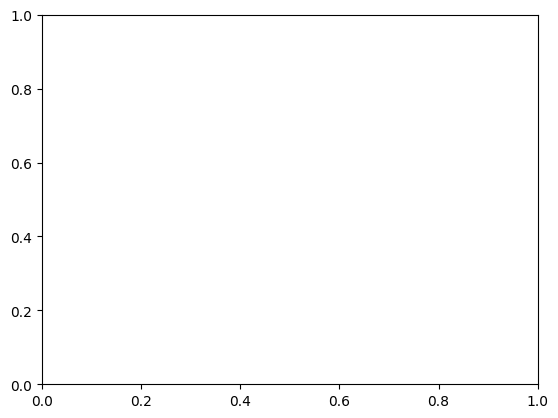

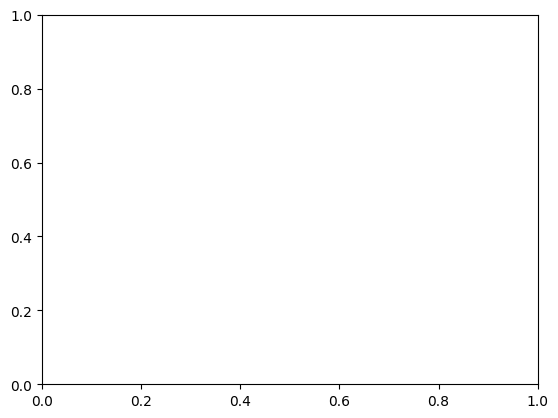

In [14]:
sns.boxplot(x="sentiment", y="Closed PnL", data=merged)
plt.show()

sns.barplot(x="sentiment", y="Size USD", data=merged)
plt.show()


In [15]:
merged = trades.merge(
    sentiment[["date", "sentiment"]],
    on="date",
    how="inner"
)



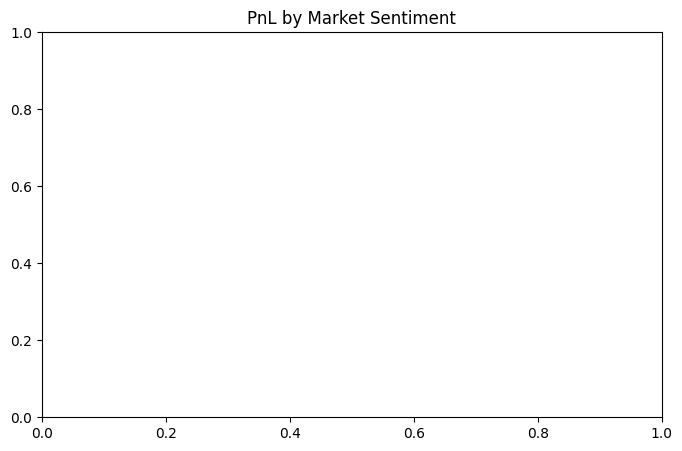

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x="sentiment", y="Closed PnL", data=merged)
plt.title("PnL by Market Sentiment")
plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()


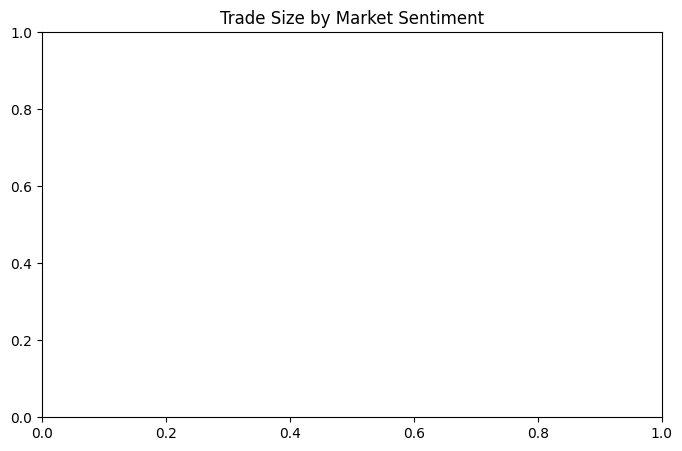

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="sentiment", y="Size USD", data=merged)
plt.title("Trade Size by Market Sentiment")
plt.savefig("outputs/trade_size_by_sentiment.png")
plt.show()
